# A Simple Perceptron Implementation
This Perceptron implementation was originally inspired by the the version from "Python Machine Learning by Sebastian Raschka 1st edition" (ISBN-13: 978-1783555130), but it has been completely re-written so as to have almost nothing in common with it. It has been written to be more pedagogically accessible to less savvy programmers.

Please feel free to use this as you see fit, but please give credit (or blame) as appropriate.

**Note**:check out the newer edition(s) of "Python Machine Learning" as well as other greate books like "[The Deep Learning Book](https://www.deeplearningbook.org/)" to support these authors, after all, writing a Noteboook is time consuming, but writing a decent book is exhausting.

# Python Packages
Python comes with a dizzying number of packages for all sorts of things. If you are going to do data science with python you will likely need to know quite a few. In this implementation, we wil be using:

- [Numpy](http://www.numpy.org/): A great mathematical package for n-dimentional arrays and mathy sorts of things.
- [MatPlotLib](https://matplotlib.org/): A great matlab-like plotting library for visualization.
- [Pandas](https://pandas.pydata.org/): A reduculously easy to use data loading, visualization, processing, etc.
- [SKLearn](https://scikit-learn.org/stable/): A package specifically for learning meachine learning.

In order to use these packages, they first must be installed on your system. Once installed, we need to "import them". Read the comments in the code to learn more.

In [0]:
# Because we are lazy, I mean efficient, we don't want to type "numpy"
# when ever we want to use something in the numpy package so we give
# it a nickname "np" by importing it "as np". Thereafter whereever we
# would have to type five letters (numpy) we can type two (np) being
# 60% more efficient!
import numpy as np
# We can even give packages inside packages nicknames the same way.
# Since we're only going to use the pyplot package inside the
# matplotlib package, we can create "plt" pointing to it directly.
import matplotlib.pyplot as plt
# Same for pandas...
import pandas as pd
# Since we're only going to use the iris data set from sklearn,
# we import ony the "load_iris" method here. We can now call
# it directly
from sklearn.datasets import load_iris

# Getting the data
Here we load the data that we're going to use into a variable called
"`iris`".

The format is one that is a `dict` and has the format:
```python
  {
    'data': array([ [...], [...], ... [...]],
    'target': array([0,0,0, ... 2,2,2],
    'target_names': array(['setosa', 'versicolor', 'virginica']),
    'DESCR': 'Long string description',
    'feature_names': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
  }
```
Note that the `data`, `target`, and `target_names` keys have values that are numpy.nd arrays.
This allows us to use all of the great NumPy methods.

In [0]:
iris = load_iris()
# Uncomment to see what this looks like.
# print(iris)

# Converting the data Data Sciency-Style

Although the data format of `iris` is useful, we want it in a slightly different format. There are many ways we could use to get to the desired formats, but I'll show you a neat trick to load them into a Pandas data object that allows us to view the data nicely.

**NOTE**: You don't need to know the details of this, but it's neat to see what Pandas and NumpPy can do for you in a single lines of code. If you would like an explanation of what is going on or an example of how to do this in a more "long-hand" intuitive way, just let me know and we'll do that.

In [3]:
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
dataset.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


You can probably see why this might be useful, especially to make sure that you have the data you think you have.

**Note**: The first column with no heading and just numbers is not really a column in the data, it just shows you the index of each row with the index starting at `0` as in most languages. The data contain 150 rows (fifty for each species) indexed from `0` to `149` and 5 columns index from `0` to `4`.

Moving along...

# Getting the Features and Labels (Targets)

Ultimately we want a 2-dimensional array of features, since our Perceptron implementation will only be able to deal with two. The `iris` data set also contain three species of flowers: setosa, versicolor, and virginica. The Perceptron is a binary classifier and therefore can only handle two, so we also need to take only two species.

For this exercise, we'll take the first two: setosa and versicolor.

We "know" that the first 100 rows contain those two species, because we looked at the data (trust me) even though we could use some tricks to extract the first two labels (aka targets). For now, we'll use our knowledge of the data.

## Fancy Array Indexing

Here we use "fancy indexing" which most array-like objects support. To grab the first 3 rows of a one dimensional array, we can do this:

```python
a = [1,2,3,4,5,6,7,8,9,10]
print(a[0:2])
```
Which will print `[1,2,3]`. You can also do things like `a[:2]` for the same result, `a[-1]` and much more. See:

In [4]:
a = [1,2,3,4,5,6,7,8,9,10]
print("a = %s" %a)
print("a[0:2]  = %s" %a[0:2])
print("a[:2]   = %s" %a[:2])
print("a[-1]   = %s" %a[-1])
print("a[7:]   = %s" %a[7:])
print("a[7:10] = %s" %a[7:10])
print("a[7:-1] = %s" %a[7:-1])
print("a[:]    = %s" %a[:])
print("a[::2]  = %s" %a[::2])
print("a[1::2] = %s" %a[1::2])

a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a[0:2]  = [1, 2]
a[:2]   = [1, 2]
a[-1]   = 10
a[7:]   = [8, 9, 10]
a[7:10] = [8, 9, 10]
a[7:-1] = [8, 9]
a[:]    = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a[::2]  = [1, 3, 5, 7, 9]
a[1::2] = [2, 4, 6, 8, 10]


NumPy arrays go even further:

In [5]:
a = np.array(a)
print(a[a % 3 != 0])

[ 1  2  4  5  7  8 10]


## Getting the Labels (Targets)

To get the labels (aka targets) from the pandas `dataset` for just the setosa and versicolor species, we'll grab the fith column (index `4`) for the first 100 rows.

In [0]:
labels = dataset.iloc[0:100, 4].values

We can see that we did what we thought we did by printing the first 3 and last 3 elements of `labels`

In [7]:
print(labels[:3],labels[-4:-1])

[0. 0. 0.] [1. 1. 1.]


Notice that the labels are `floats`. Remember that the Perceptron does not understand text labels, only numerical ones, so this is what we want.

We can also find out how many unique values there are...

In [8]:
print(np.unique(labels))

[0. 1.]


There are two values only, great! There are many neat things that we can do with NumPy arrays, by the way. If we want to count the number of non-zero values:

In [9]:
print(np.count_nonzero(labels))

50


If we want to grab all of the rows with zero values, there are several ways to do this, but one great way is to mask the array. You can do that with a simple comparison operator. `labels == 0` will return an array of True and False and if you then use that to index into a NumPy array it will return only those values that have `True`. For example the following resturns the last 50 elements of `labels` since they have a value of 1:

In [10]:
print(labels[labels == 1])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


Using this method combinbed with the NumPy "where" method, we can convert all the values. Since we will first run a Perceptron with classes `-1` and `1` rather than `0` and `1`, we'll change all values accordingly:

In [0]:
labels = np.where(labels == 0, -1, 1)

Now setosa is `-1` and versicolor is `1` (unchanged).

## Getting the Features

Now we'll get the features. Our poor little Perceptron binary classifier can only handle two, so we'll pick the sepal length and petal length.

**Note**: Don't know what a sepal is? [Look it up](https://en.wikipedia.org/wiki/Sepal)! Don't know what a petal is? See me.

Those are found in the first and third columns of our `dataset` (indexes `0` and `2` respectively):

In [0]:
features = dataset.iloc[0:100, [0, 2]].values

You may want to make sure you got this right by using `head` and fancy indexing to compare:

In [13]:
print(features[:5])
dataset.head(5)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


All good. We could have done this exact same thing in two lines of code:

In [0]:
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
labels, features = np.where(dataset.iloc[0:100, 4].values==0,-1,1), dataset.iloc[0:100, [0, 2]].values

But I think you'll agree that it would have been harder to understand.

# The Perceptron
Classes and objects in python are a mostly like classes and object in other OO languages with some
annyoing or welcome differences depending on your mood that day. I am going to assume that you
understand the concepts of classes and objects well enough to read the code below and understand it
especially with all the comments. If you find it confusing, just let me know.

In [0]:
class Perceptron(object):
    """
    A reasonably accurate but object-oriented and pythonesque
    implementation of the 1957-1958 Rosenblat Perceptron.
    
    See:
    
    Rosenblatt, Frank. "The perceptron: a probabilistic model for
    information storage and organization in the brain." Psychological
    review 65.6 (1958): 386.
    
    The __init__ function is omitted
    """

    def fit(self, features, labels, learning_rate=0.01, num_iterations=50, init_random=False, show_all=False):
        """
        Fit training data.
        
        Parameters
        ---------
        features : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and n_features
            is the number of features.
        labels : array-like, shape = [n_samples]
            Target values.
        learning_rate : float
            Learning rate (between 0.0 and 1.0)
        num_iterations: int
            Number of passes or epochs over the training dataset.
        init_rantom : boolean
            If true, randomly initialize the weights, otherwise
            make them all zero to start.
        show_all : boolean
            If true, will plot each iteration. Lots of output!

        Returns
        ------
            self : object
        """
        # We "store" the values within the Perceptron for
        # convenience. If you access these values they will always be
        # the most recently "fitted" values, so keep that in mind. We
        # do this so that we can later use the perceptron to visualize
        # it. It would be better to have a different class to do that.
        self.features = features
        self.labels = labels
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        
        # Here we figure out what the two labels are. The labels need
        # to be numeric values and could in theory be any to floating
        # point numbers. Conventionally, they are either [0,1] or
        # [-1,1].

        # We can use the numpy unique method which returns a sorted np
        # arry of all the unigue values. If the labels are not
        # numbers, things may not work out too well.
        unique_labels = np.unique(self.labels)
        # Since this is a binary classifier, it can only handle two
        # values. If we don't have two values, we die a horrible
        # death.
        if len(unique_labels) != 2:
            raise ValueErrir("Sorry, there were %d unique labels in "+
                             "the training set and we need exactly "+
                             "two. Try avain." %len(unique_labels))
        # The first value is the lowest
        self.a_num = unique_labels[0]
        self.b_num = unique_labels[1]
        # The threshold is in the middle.
        self.threshold = (self.a_num * 1.0 + self.b_num) / 2
        # We'll use the rage to normalize the error we calculate.

        # Create an array (list) of internal internal weights to be
        # used by this perceptron. These "internal" weights are NOT
        # the same thing as the weights between nodes in a neural
        # network, but are similar in many ways.
        
        # We will need an array with one more member than the number
        # of feathres since we will have a bias weight. To calculate
        # the length of this array, we simply find the number of
        # features (a 2D array and the size of the second dimension is
        # the number of features) plus one.
        num_weights = 1 + self.features.shape[1]
        if init_random is False:
          # If we're not going to initialize the internal weights
          # randomly, then create an array (list) initialized to zero.
          self.weights = np.zeros(num_weights)
        else:
          # Initialize the weights randomly.
          self.weights = np.random.rand(num_weights)
          # Note, that that numpy returns an array of randomm
          # variables between 0.0 and 1.0. The values are not
          # distributed in a Gaussian format, rather each value has
          # approximately the same probability. For now, we do not go
          # into the details, but this is generally not the best
          # initialization possible. In order to make the values range
          # from -1 to +1 (so we have a mix of positive and negative),
          # we can stretch the values by two:
          self.weights *= 2
          # And then shift them down by one:
          self.weights -= 1
          # Now the values range from -1.0 to 1.0. Note that the
          # values could be -1000 to +17, but since we're expecting
          # values between -1 and 1 at the most, random weights
          # between those two values seem most rasonable.
          pass
        # We will use an array (list) to keep track of the number of
        # misclassified samples during each iteration (often referred
        # to as "epoch"). Each iteration will have one value which is
        # simply the count misclassified samples.
        self.misclassifications_counter = []
        # Now we run a loop self.num_iterations number of times. The
        # no-name variable "_" is a convention used to tell the world
        # that although the for loop requires us to use a variable, we
        # will not be using it anywhere in the code.
        for _ in range(self.num_iterations):
            # The current number of misclassified samples
            errors = 0
            # Here we use the "zip" function to make things easier to
            # code but with a cost to readability. In short,
            # zip(self.features,self.labels) with iterate over all of
            # the elements of self.features (a 2D array) and
            # self.labels (a 1D array) and return a tuple in the form
            # of the self.features element and the self.labels element
            # at each index. self.features and self.labels must be the
            # same length along the first dimension.
            for sample_features, correct_label in zip(self.features, self.labels):
                if show_all:
                    self.show(True)
                    pass

                # For a data set where self.features has two features,
                # sample_features = [feature1,feature2] and
                # self.labels = correct_label class (a_num or n_num in
                # our case)
                
                # We send along the two features and see which class
                # we predict
                predicted_label = self.predict_label(sample_features)
                # Uncomment to see what's going on:
                # print("Predicted = %s, Targed = %s" %(predicted_label, correct_label))

                # The difference between the correct and predicted
                # tells us how far off we were. This could be positive
                # or negative. Note that which you subtract from which is
                # very important since the sign matters.
                error_amount = predicted_label - correct_label

                # We then multiply the difference by the learning rate
                # which is between 0.0 and 1.0, meaning that we'll nudge
                # the weights by a percentage of the difference.
                nudge_amount = self.learning_rate * error_amount

                #if _ < 1:
                #    print("Predicted = %s, Crrect = %s, Error = %s, Nudge = %s"
                #          %(correct_label,predicted_label,error_amount, nudge_amount))
                #    pass

                # Now, for each of the weights associated with each
                # feature, we update the weight incrementally by the
                # nudge_amount value
                self.weights[1:] += nudge_amount * sample_features

                # We also need to update the bias weight. Since the
                # bias input (you can think of it as the bias feature)
                # is 1, we simply increment it by the update value
                # (which again could be positive or negatiove)
                self.weights[0] += nudge_amount
                
                # If error_amount was non-zero, then we misclassified, so
                # cound it
                errors += int(error_amount != 0.0)

                # Close the loop for readability and continue with the
                # next sample in the training set if any.
                pass

            # Append the error count to the
            # self.misclassifications_counter array.
            self.misclassifications_counter.append(errors)

            # Now, because we know that if there were no errors the
            # weights were not changed and therefore any subesquent
            # iterations would also not change weights or results, we
            # can stop if there were no errors and save some
            # computing.
            if(errors == 0):
                return self

            # If there were errors, we'll need to try another
            # iteration (epoch) to see if we can improve. This method
            # is "stupid" in that it is possible for a given data set
            # that no solution will be found (there are ways to detect
            # this problem, but not in this code) but it will continue
            # blindly if there were misclassifications until it has
            # completed the required number of iterations (epochs)
            pass

        # We're done, so return. I often return self rather than the
        # implicit 'None' simply because it allows you to daisy chain
        # calls. In this case I can't imagine why you would, but
        # nevertheless...
        return self
    
    def predict_label(self, features):
        """
        "Predict" the class lable and return it. It will return a_num or b_num based
        on our implementation of the classical Perceptron.
        """
        # Get the float predicted label and theshold it to make this binary
        predicted = np.where(self.predict_float(features) >= self.threshold, self.a_num, self.b_num)
        return predicted
    
    def predict_float(self, features):
        """
        "Predict" the un-thresholded value and return it.
        """
        # Break out the feature weights and bias weight for readability
        bias_weight = self.weights[0]
        feature_weights = self.weights[1:]
        # Here we do a dot-product of all the features and their weights
        # (sum each feature times its weight) and add the bias weight
        predicted = np.dot(features, feature_weights) + bias_weight
        return predicted
    pass

# Display Methods
Below we add some display methods that allow us to "look" at what is going on in the Perceptron. We do this using a trick that allows us to add methods to a class after the class definition. This is normally not the way you would go about it, but I wanted to have the class definition block only contain the essential class definitions.

In [0]:
def show_errors(self):
    # Create a decent sized figure, but half the hight of the "show" figure
    plt.figure(num=None, figsize=(8, 3), dpi=96, facecolor=None)
    # Set the x axis limits
    plt.xlim(0, len(self.misclassifications_counter))
    # Set the y axis limites to one more than then max value so that it
    # does not look cut-off
    plt.ylim(0, np.max(self.misclassifications_counter) + 1)
    # We really only want integer tick marks
    plt.yticks(range(np.max(self.misclassifications_counter) + 1))
    plt.xticks(range(len(self.misclassifications_counter)))
    # Titles are nice.
    plt.title("Misclassifications per Iteration (Epoch)")
    plt.plot(range(1, len(self.misclassifications_counter) + 1), self.misclassifications_counter, marker='o')
    plt.xlabel('Iterations (Epochs)')
    plt.ylabel('Number of misclassifications')
    plt.show()
    return self

# Add to classs
Perceptron.show_errors = show_errors

def show(self,show_decision_boundary=False,resolution=0.1):
    # Create a decent sized figure
    fig = plt.figure(figsize=(8, 6), dpi=96, facecolor=None)
    # Plot the feature samples. We use transparency because some of the samples
    # have identical features and it's nice to see when there are two or more
    # "dots" on the plot.
    plt.scatter(self.features[:50, 0], self.features[:50, 1], color='red', marker='o', label='setosa', alpha=0.33)
    plt.scatter(self.features[50:100, 0], self.features[50:100, 1], color='blue', marker='p', label='versicolor', alpha=0.33)
    # Calculate the max and min making them 0.1 wider for the plot so the
    # markers fit visibly.
    x_min, x_max = self.features[:, 0].min() - 0.1, self.features[:, 0].max() + 0.1
    y_min, y_max = self.features[:, 1].min() - 0.1, self.features[:, 1].max() + 0.1
    # Size plot to fit data tightly
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    if show_decision_boundary:
        # If we're plotting the decision boundary, it would be nice to say so
        plt.title("Iris Data with Decision Boundary")
        # Calculate the line that is the decision boundary. You may recall from
        # algebra the eqution y = mx+b where m is the slope and b is the
        # x intercept. We can calculate all of these using the weights and bias
        bias = self.weights[0]
        w1 = self.weights[1]
        w2 = self.weights[2]
        x_intercept = - bias / w1
        # We don't really need the y_intercept, but if you were wondering, here
        # it is.
        y_intercept = - bias / w2
        # And here is the slope
        slope = - (bias / w2) / (bias / w1)
        # Now we can calculate y at the minimum x-axis value (from above) using
        # the good-old y = mx + b formula
        y_at_x_min = slope * x_min + y_intercept
        # And the y value at the maximum x-axis value
        y_at_x_max = slope * x_max + y_intercept
        # Plotting a line from x_min, y_at_x_min to x_max, y_at_x_max will
        # draw the line from one end of the plot to the other that shows
        # the decision boundary at the time that this method was called.
        plt.plot([x_min,x_max],[y_at_x_min,y_at_x_max],'k-',label='decision boundary', alpha=0.5)
    else:
        plt.title("Iris Data")
        pass
    plt.xlabel('petal length')
    plt.ylabel('sepal length')
    plt.legend(loc='upper left')
    plt.show()
    return self

# Add to class
Perceptron.show = show

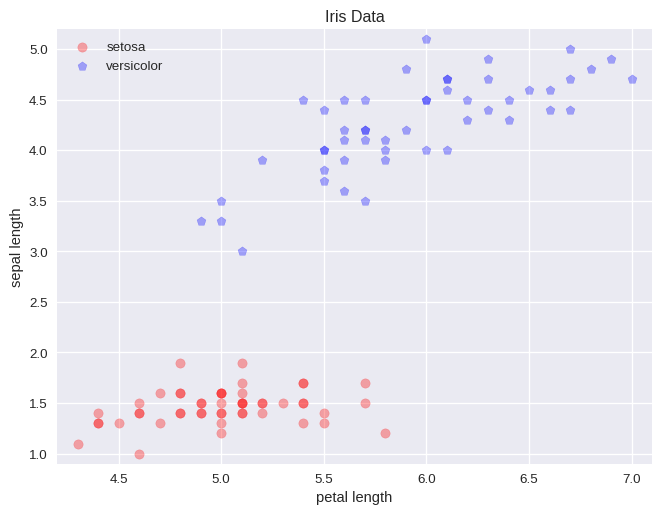

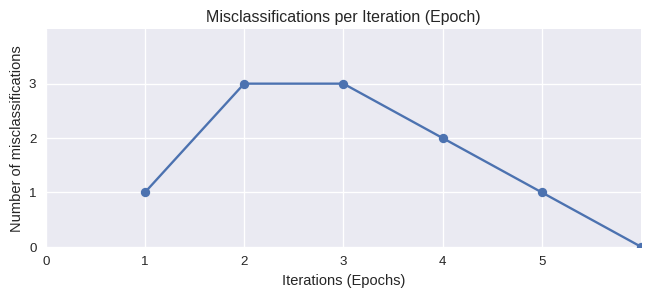

In [46]:
# Hopefully it looks good at this point. So let's run a trial and plot the
# misclassifications each iteration (epoch)
ppn = Perceptron()
ppn.fit(features, labels)
ppn.show()
ppn.show_errors()
# Put here to avoind output like ''<__main__.Perceptron at 0x7f7d9be24198>''
# which the Notebook likes to add if a method returns something that is not
# assigned.
_ = 1

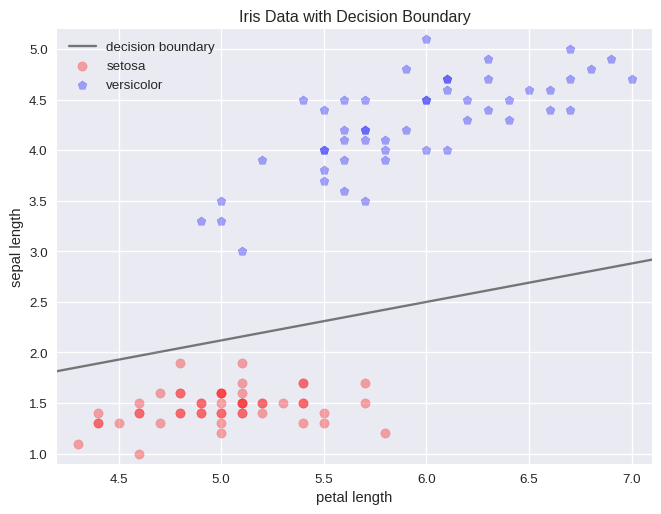

In [47]:
# If we want to see the decision, we can plot it
_ = ppn.show(True)

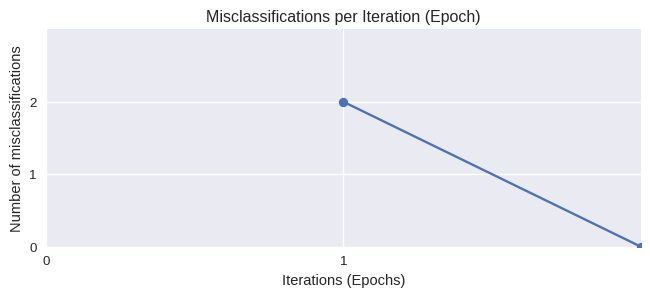

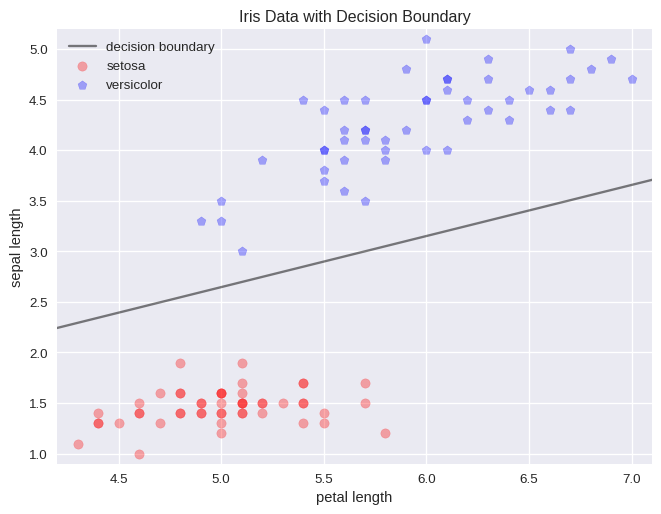

In [48]:
# Now let's try with random weights
_ = ppn.fit(features, labels, init_random=True).show_errors().show(True)